# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import requests
import json
import io

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading the WeRateDogs Twitter archive data
twitter_archive_data = pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url).content
with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response)
image_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')

3. Use the Requests library to download the weratedog tweets (tweet_json.txt)

In [4]:
#import tweepy

#consumer_key = 'YOUR CONSUMER KEY'
#consumer_secret = 'YOUR CONSUMER SECRET'
#access_token = 'YOUR ACCESS TOKEN'
#access_secret = 'YOUR ACCESS SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
url = 'https://video.udacity-data.com/topher/2018/November/5bf60cc8_tweet-json/tweet-json'
response = requests.get(url)

In [6]:
import os
folder_name = 'weratedogstweets'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# reading the json file
df = []
for tweets in os.listdir(folder_name):
    with open(os.path.join(folder_name, tweets), 'r') as file:
        for line in file:
            tweet = json.loads(line)
            tweet_id = tweet['id']
            retweet_count = tweet['retweet_count']
            favorite_count = tweet['favorite_count']
            df.append({'tweet_id': tweet_id, 'retweet_count': retweet_count,'favorite_count': favorite_count})
tweets = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count','favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment
#### Assessing the data visually for qualityand tidiness issues

In [8]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic assessment

#### Assessing the data programmatically for quality and tidiness issues

In [11]:
twitter_archive_data.shape

(2356, 17)

In [12]:
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
# to get some useful descriptive analysis of the dataset
twitter_archive_data[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The maximum ratings a dog has is 1776 while the minimum is 0, this ratings is a special feature of the WeRateDogs tweets. The rating denominator can go as high as 170.

In [16]:
twitter_archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive_data.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
sum(twitter_archive_data.duplicated())

0

In [19]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
tweets.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


###### Quality issues
*Twitter_archive_data*

1. Some of the names in the name column are not proper dog names

2. Dataset contains retweets and replies, but we need only original tweets, not retweets or replies

3. Incorrect datatypes

4. Irrelevant columns that would not be used for analysis

5. The source column contains data that should be split to give more meaningful information

*Image predictions dataset*

6. Some column names are not descriptive (p1,p1_conf,p2,p2_conf,p3,p3_conf)

7. Some of the p1_dog an p2_dog columns have false values which means they are not identified as dogs by the neural network.

8. Tweet_id column has an incorrrect datatype

9. Use of both lower and upper case in the predictions columns 

*Tweets dataset*

10. Tweet_id column has an incorrrect datatype


### Tidiness issues
*Twitter_archived_data dataset*

1. The doggo, floofer, pupper and puppo columns which are dog stages should be a single column.

*Image_prediction dataset*

2. it contains repeated predictions of dog type along with the confidence interval, the prediction with the highest confidence interval should be used for analysis and others dropped.

3. The three datasets should be merged together to give one master dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
twitter_archive_data_clean = twitter_archive_data.copy()
image_prediction_clean = image_prediction.copy()
tweets_clean = tweets.copy()

In [26]:
twitter_archive_data_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [27]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
tweets_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Issue #1:  Dataset contains retweets and replies, but we need only original tweets, not retweets or replies

#### Define: Dropping the rows where retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,  in_reply_to_status_id, in_reply_to_user_id are non_null because this shows that they are replies or retweets and not original tweets.

#### Code

In [29]:
#checking for the sum of the non-null values in the in_reply_to_status_id, in_reply_to_user_id columns
print(twitter_archive_data_clean.in_reply_to_status_id.notnull().sum())
print(twitter_archive_data_clean.in_reply_to_user_id.notnull().sum())

78
78


In [30]:
#checking for the sum of the non-null values in the retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp  columns
print(twitter_archive_data_clean.retweeted_status_id.notnull().sum())
print(twitter_archive_data_clean.retweeted_status_user_id.notnull().sum())
print(twitter_archive_data_clean.retweeted_status_timestamp.notnull().sum())

181
181
181


In [31]:
#dropping the rows
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean.retweeted_status_id.isnull()]
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean.in_reply_to_user_id.isnull()]

#### Test

In [32]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Irrelevant columns that would not be used for analysis


#### Define: Dropping all the replies and retweets columns as they wont be needed for analysis 

#### Code

In [33]:
twitter_archive_data_clean = twitter_archive_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [34]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: The doggo, floofer, pupper and puppo columns which are dog stages should be a single column.

#### Define: creating a single column for the dog stages using the pandas melt function. 

#### Code

In [35]:
twitter_archive_data_clean = pd.melt(twitter_archive_data_clean, id_vars=['tweet_id','timestamp','source','text','expanded_urls',
                                     'rating_numerator','rating_denominator','name'], var_name='dog', value_name='dog_stage')

In [36]:
twitter_archive_data_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,puppo,None
8384,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,puppo,None
8385,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,puppo,None
8386,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,puppo,None


In [37]:
twitter_archive_data_clean.dog_stage.replace('None',np.NAN, inplace = True)

In [38]:
sum(twitter_archive_data_clean['tweet_id'].duplicated())

6291

In [39]:
# remove duplicate tweet ids
twitter_archive_data_clean = twitter_archive_data_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'first')

In [40]:
#drop  the dog column
twitter_archive_data_clean = twitter_archive_data_clean.drop(['dog'], axis =1)

#### Test

In [41]:
twitter_archive_data_clean['dog_stage'].value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

In [42]:
sum(twitter_archive_data_clean['tweet_id'].duplicated())

0

In [43]:
twitter_archive_data_clean['dog_stage'].unique()

array(['doggo', 'floofer', 'pupper', 'puppo', nan], dtype=object)

In [44]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 9 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #4: Some of the names in the name column are not proper dog names 

#### Define: The invalid names in the column eg a,an,some,none etc would be converted to a single keyword, 'none, for easy grouping.

#### Code

In [45]:
twitter_archive_data_clean.name.value_counts().head(15)

None       603
a           55
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Sadie        8
Winston      8
the          8
Daisy        7
Toby         7
Stanley      6
Name: name, dtype: int64

This shows that the correct dog names are capitalized while the incorrect names are in lower case.

In [46]:
wrong_names = twitter_archive_data_clean['name'].str.contains('^[a-z]',regex = True)

In [47]:
twitter_archive_data_clean[wrong_names]['name'].value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [48]:
#converting all the wrong names to a single keyword 'none'
twitter_archive_data_clean.loc[wrong_names, 'name'] = 'None'

In [49]:
# converting all the 'None' keywords to nan
twitter_archive_data_clean['name'].replace('None', np.nan, inplace = True)

#### Test

In [50]:
twitter_archive_data_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
862,739544079319588864,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,https://twitter.com/dog_rates/status/739544079...,10,10,NaN,NaN
1034,710844581445812225,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,NaN
1014,713177543487135744,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,NaN
690,759557299618865152,2016-07-31 01:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,NaN
839,742423170473463808,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,NaN
1609,675710890956750848,2015-12-12 16:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He was just told that he couldn...,https://twitter.com/dog_rates/status/675710890...,12,10,Lenny,NaN
1731,672968025906282496,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,NaN
241,836001077879255040,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13,10,NaN,NaN
1165,700462010979500032,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,NaN
1774,671882082306625538,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,NaN


In [51]:
twitter_archive_data_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Davey          1
Kawhi          1
Fizz           1
Dixie          1
Christoper     1
Name: name, Length: 929, dtype: int64

### Issue #5: Incorrect datatypes

#### Define: convert the tweet_id column from integer to string

#### Code

In [52]:
twitter_archive_data_clean['tweet_id'] = twitter_archive_data_clean['tweet_id'].astype(str)
twitter_archive_data_clean['timestamp'] = pd.to_datetime(twitter_archive_data_clean['timestamp'])

#### Test

In [53]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 9 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


### Issue #6:The source column contains data that should be split to give more meaningful information

#### Define: The source column gives the location a user tweets from, but is in url form. The replace function would be used to extract the exact source.

#### Code

In [54]:
twitter_archive_data_clean['source'] = twitter_archive_data_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\User\AppData\Local\Temp\ipykernel_15236\3066283285.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_data_clean['source'] = twitter_archive_data_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [55]:
twitter_archive_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
715,756526248105566208,2016-07-22 16:28:07+00:00,Twitter for iPhone,All hail sky doggo. 13/10 would jump super hig...,https://twitter.com/dog_rates/status/756526248...,13,10,NaN,doggo
710,757393109802180609,2016-07-25 01:52:43+00:00,Twitter for iPhone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo
697,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo
689,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo


### Issue #6:Some column names are not descriptive (p1,p1_conf,p2,p2_conf,p3,p3_conf)

#### Define: Change the column names to more descriptive column names using the rename function

#### Code

In [56]:
image_prediction_clean = image_prediction_clean.rename(columns={'p1':'prediction1', 'p1_conf':'confidence1', 'p1_dog':'prediction1_dog',
                                                                        'p2':'prediction2', 'p2_conf':'confidence2', 'p2_dog':'prediction2_dog',
                                                                         'p3':'prediction3', 'p3_conf':'confidence3', 'p3_dog':'prediction3_dog'})

#### Test

In [57]:
image_prediction_clean

,tweet_id,jpg_url,img_num,prediction1,confidence1,prediction1_dog,prediction2,confidence2,prediction2_dog,prediction3,confidence3,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #7: Incorrect datatype for the tweet_id column

#### Define: Convert the tweet_id column to a string using the astype function

#### Code


In [58]:
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)

#### Test

In [59]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   prediction1      2075 non-null   object 
 4   confidence1      2075 non-null   float64
 5   prediction1_dog  2075 non-null   bool   
 6   prediction2      2075 non-null   object 
 7   confidence2      2075 non-null   float64
 8   prediction2_dog  2075 non-null   bool   
 9   prediction3      2075 non-null   object 
 10  confidence3      2075 non-null   float64
 11  prediction3_dog  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8: Use of both lower and upper case in the predictions columns 

#### Define: change them to the same case(lower case)

#### Code

In [60]:
image_prediction_clean['prediction1']= image_prediction_clean.prediction1.str.lower()
image_prediction_clean['prediction2']= image_prediction_clean.prediction2.str.lower()
image_prediction_clean['prediction3']= image_prediction_clean.prediction3.str.lower()

#### Test

In [61]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction1,confidence1,prediction1_dog,prediction2,confidence2,prediction2_dog,prediction3,confidence3,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #9: Some of the p1_dog an p2_dog columns have false values which means the images were not identified as dogs by the neural network.

#### Define: Sort out those values that were not identified as dogs and drop them from the dataset

#### Code

In [62]:
#creating a list of predctions and confidence that identifies a dog 
predictions =[]
confidence = []

def values(image_prediction_clean):
    if image_prediction_clean['prediction1_dog'] == True:
        predictions.append(image_prediction_clean['prediction1'])
        confidence.append(image_prediction_clean['confidence1'])
    elif image_prediction_clean['prediction2_dog'] == True:
        predictions.append(image_prediction_clean['prediction2'])
        confidence.append(image_prediction_clean['confidence2'])
    elif image_prediction_clean['prediction3_dog'] == True:
        predictions.append(image_prediction_clean['prediction3'])
        confidence.append(image_prediction_clean['confidence3'])
    else:
        predictions.append('Error')
        confidence.append('Error')
        
image_prediction_clean.apply(values, axis =1)
image_prediction_clean['dog_breed'] = predictions
image_prediction_clean['confidence'] = confidence

In [63]:
#drop rows that have false values whih shows that they were not identified as dogs
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_breed'] != 'Error']

In [64]:
# drop columns we would not be needing for analysis
image_prediction_clean.drop(image_prediction_clean.iloc[:, 2:12], inplace = True, axis = 1)

C:\Users\User\AppData\Local\Temp\ipykernel_15236\1184145256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean.drop(image_prediction_clean.iloc[:, 2:12], inplace = True, axis = 1)


#### Test

In [65]:
image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #10: Incorrect datatype for the tweet_id column in tweets_clean dataset

#### Define: Convert the column to string using the astype function

#### Code

In [66]:
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

#### Test

In [67]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #11: The three datasets should be merged together to give one master dataset.

#### Define: The three datasets would be merged to give one master dataset using the pd.merge function

#### Code

In [68]:
# merge twitter_archive_data_clean and image_prediction_clean on tweet_id
twitter_archive_data_clean = pd.merge(twitter_archive_data_clean, image_prediction_clean, on = 'tweet_id', how = 'inner') 

In [69]:
master_df = pd.merge(twitter_archive_data_clean, tweets_clean, on = 'tweet_id', how = 'inner')

#### Test

In [70]:
master_df.shape

(1666, 14)

In [71]:
master_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,7711,32467
1,757393109802180609,2016-07-25 01:52:43+00:00,Twitter for iPhone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,labrador_retriever,0.787125,2009,6462
2,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,chesapeake_bay_retriever,0.480048,4376,12376


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
master_df.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The popular dog breeds

2. Dog distribution among the four stages

3. The common dog names

4. Relationship between likes and retweets

5. what is the most popular source of tweets for our dataset?

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [75]:
# To determine the most common names
master_df['name'].value_counts()

Charlie       10
Lucy          10
Cooper        10
Oliver         9
Tucker         9
              ..
Snicku         1
Mack           1
Nimbus         1
Dobby          1
Christoper     1
Name: name, Length: 832, dtype: int64

Charlie, Lucy and Cooper appear to be popular names for the dogs in the dataset with 10 dogs bearing each name respectively, followed closely by Oliver and Tucker with 9 each.

In [76]:
# To determine the most popular tweet source
master_df['source'].value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

Most of the tweets came from an iphone as it makes up the majority with 1635 tweets out of 1666 coming from it.

### Visualization

[Text(0.5, 0, 'Dog  stages'), Text(0, 0.5, 'Number ofdogs')]

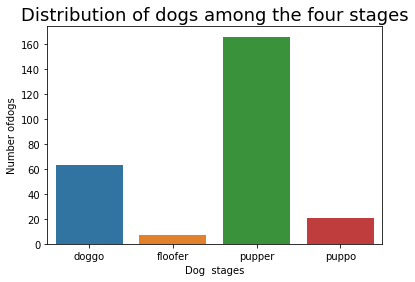

In [77]:
# Dog distribution among the four stages
s= sns.countplot(x='dog_stage', data=master_df)
s.set_title('Distribution of dogs among the four stages',fontsize=18)
s.set(xlabel='Dog  stages',
      ylabel='Number ofdogs')

The more common dog stage is the pupper, followed by doggo, then puppo with floofer being the least.

Text(0, 0.5, 'Number of dogs')

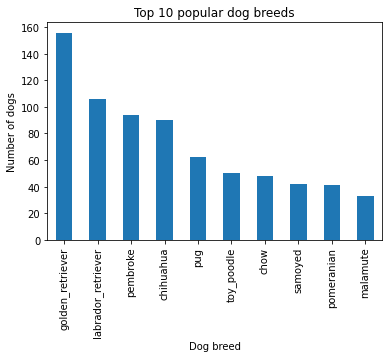

In [78]:
# The popular dog breeds
popular_breeds = master_df.dog_breed.value_counts().nlargest(10)
popular_breeds.plot.bar()
plt.title('Top 10 popular dog breeds')
plt.xlabel('Dog breed')
plt.ylabel("Number of dogs")

The most popular dog breed is the golden retriever followed by the labrador retriever.

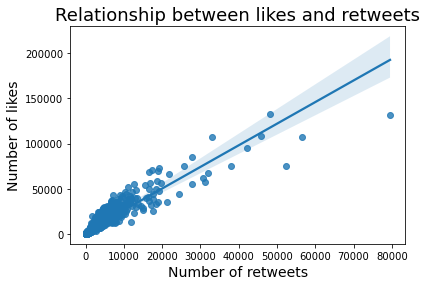

In [79]:
# Relationship between likes and retweets
sns.regplot(x = 'retweet_count', y = 'favorite_count', data = master_df )
plt.title('Relationship between likes and retweets',fontsize=18)
plt.xlabel('Number of retweets',fontsize=14)
plt.ylabel('Number of likes', fontsize=14);

They appear to be a positive relationship between likes and retweets, the more the retweets, the higher the number of likes a tweet gets.